In [1]:
# operate and computate the array
import numpy as np
# operate the dataframe
import pandas as pd
# plot 
import matplotlib.pyplot as plt 
import seaborn as sns
# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# set the figure theme
sns.set_theme(style="whitegrid")

# set the variable

In [3]:
# read the data
data = pd.read_csv('data.csv')
# standardize the iv
data['cpp_amplitude'] =(data['cpp_amplitude']-data['cpp_amplitude'].mean())/data['cpp_amplitude'].std()
data['cpp_peak'] =(data['cpp_peak']-data['cpp_peak'].mean())/data['cpp_peak'].std()
data['cpp_slope'] =(data['cpp_slope']-data['cpp_slope'].mean())/data['cpp_slope'].std()

# fit the model

## amplitude

### regplot

In [15]:
# Set the feature
cpp = "cpp_amplitude"

# Regression
y = data['rt']
x = data[cpp]
X = sm.add_constant(x)

m = sm.OLS(y,X)
mrs = m.fit()
mrs.summary()

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     157.7
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           1.91e-35
Time:                        10:24:49   Log-Likelihood:                 493.03
No. Observations:                3661   AIC:                            -982.1
Df Residuals:                    3659   BIC:                            -969.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4376      0.003    125.155      0.000       0.431       0.444
cpp_amplitude    -0.0439      0.003    -12.558      0.000      -0.051      -0.037
==============================================================================
Omnibus:                     1761.727   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12304.117
Skew:                           2.190   Prob(JB):                         0.00
Kurtosis:                      10.840   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(0.0, 1.0)

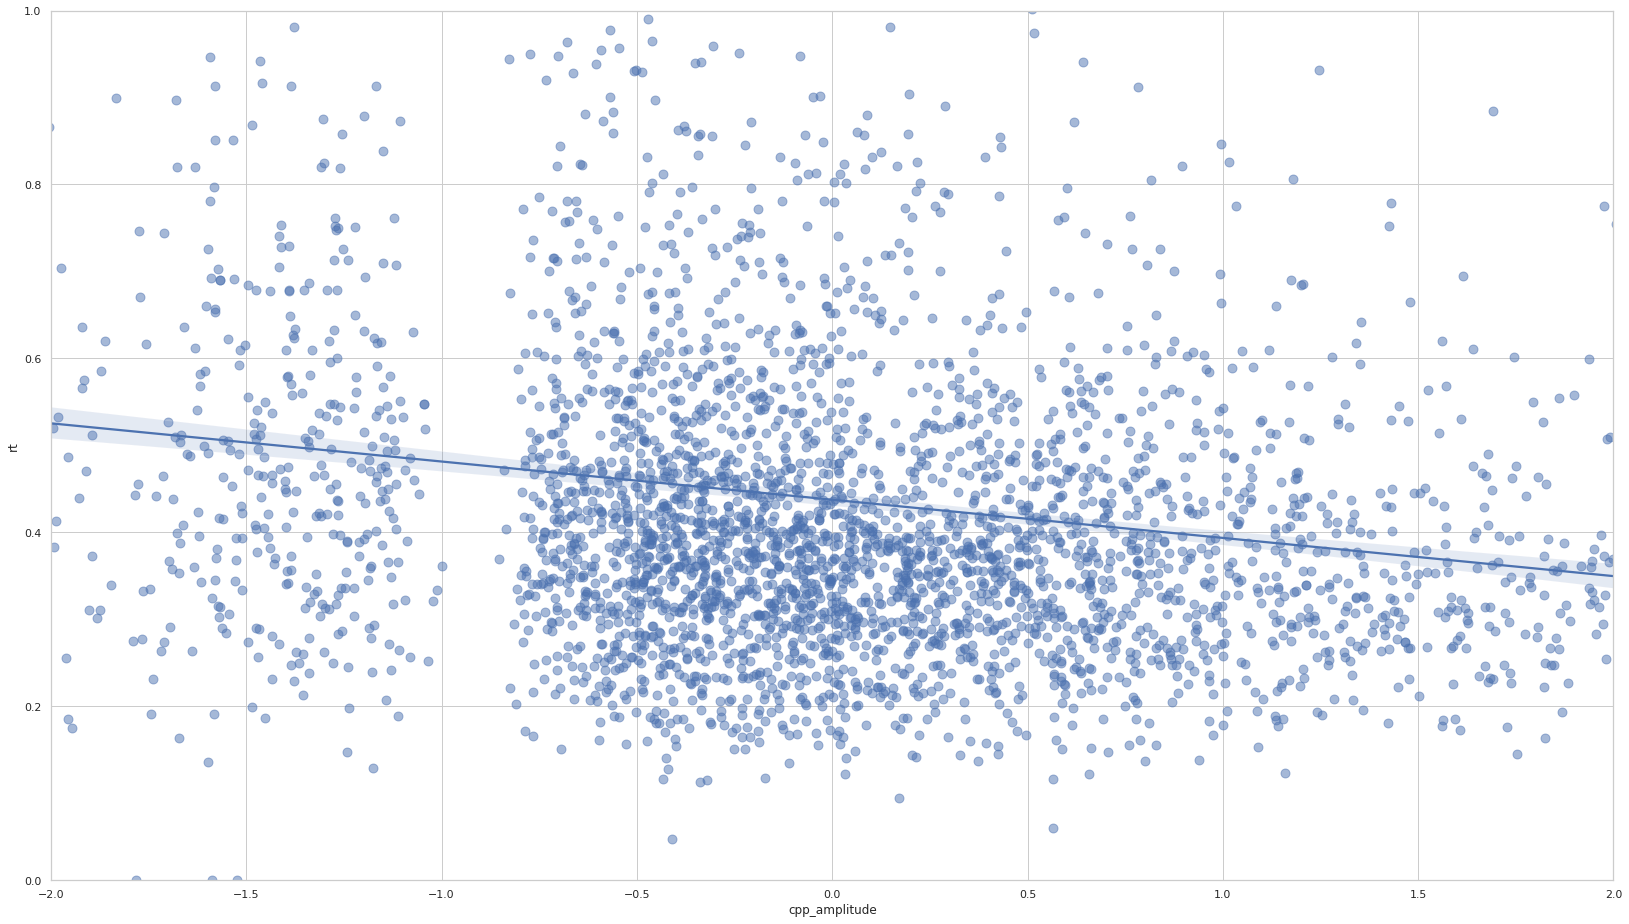

In [14]:
# Set the figure size
fig = plt.figure(figsize=(28,16))

# Create the regplot two coherence for the current subject
sns.regplot(x=cpp, 
           y="rt", 
           data=data, 
           ci=95, 
           scatter_kws={"s": 80,"alpha":0.5},)
# Set the title of the subplot
plt.xlim([-2,2])
plt.ylim([0,1])

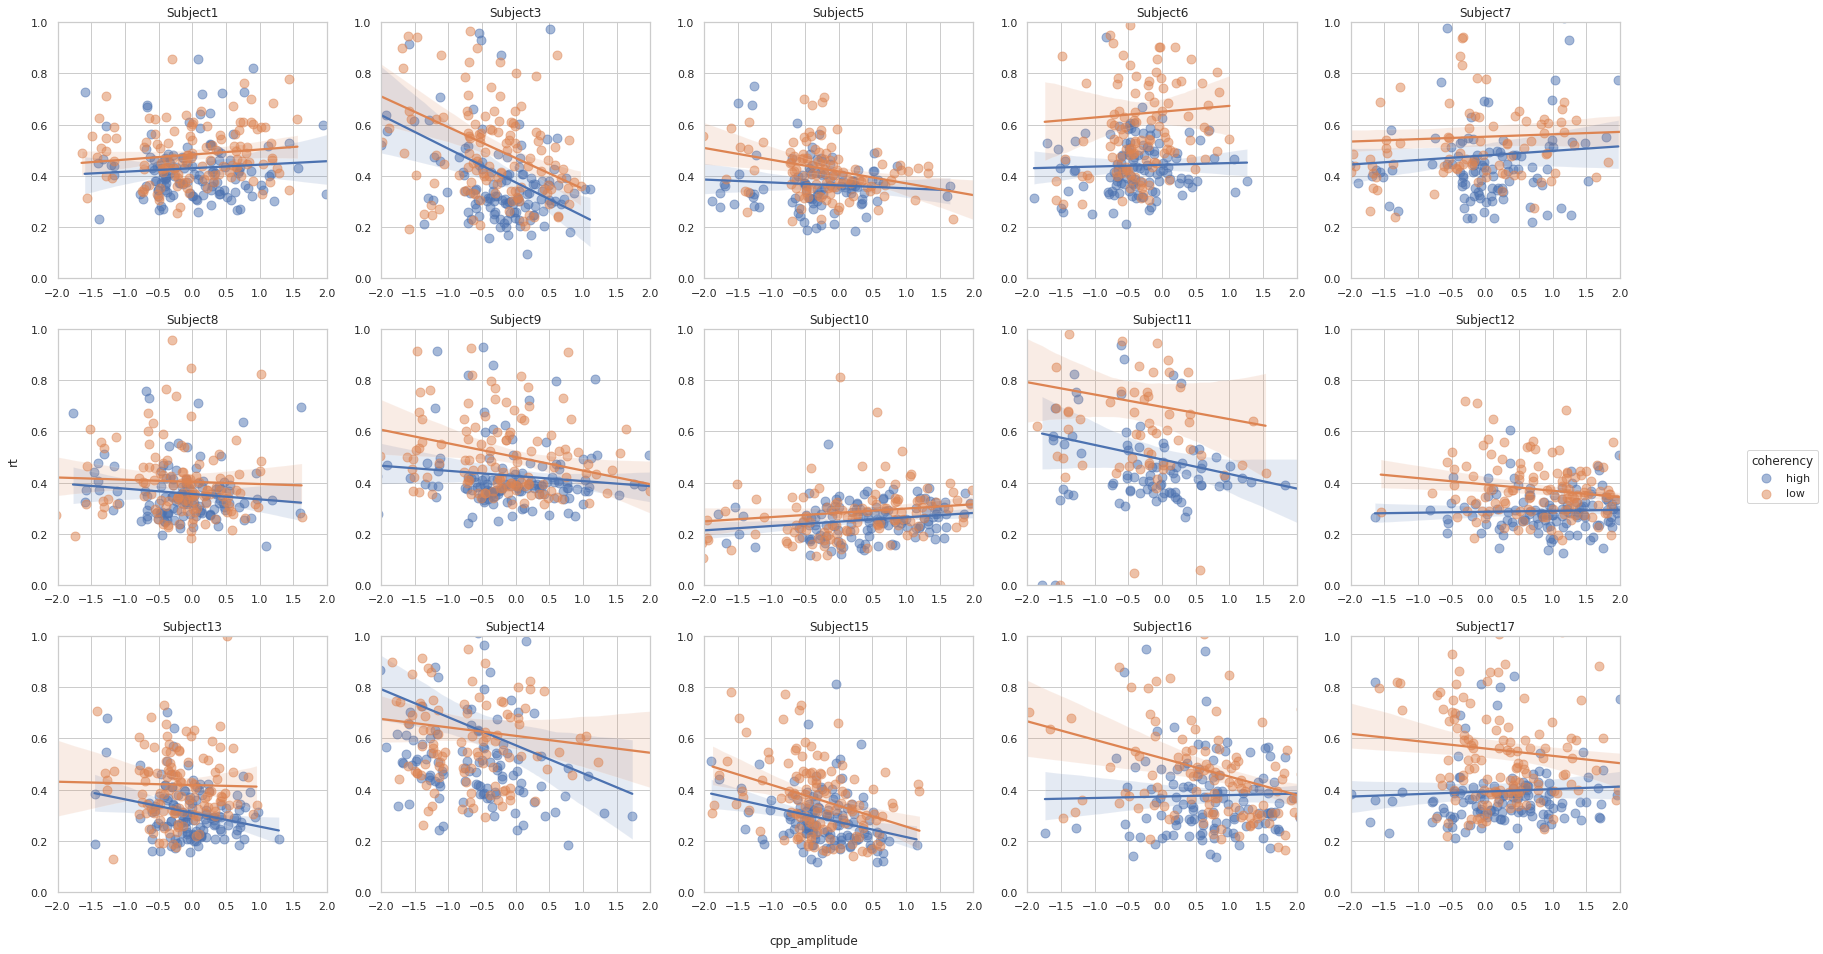

In [307]:
# Set the feature
cpp = "cpp_amplitude"
# Set the figure size
fig = plt.figure(figsize=(28,16))
# Get the unique subject indices
subj_indices = data['subj_idx'].unique()
# Loop over the subject indices
for i,subj in enumerate(np.sort(subj_indices)):
    # Create a subplot for each subject
    ax = fig.add_subplot(3,5,i+1)
    # Create the regplot two coherence for the current subject
    sns.regplot(x=cpp, 
               y="rt", 
               data=data[(data['subj_idx']==subj)&(data['coherency']=='high')], 
               ci=95, 
               scatter_kws={"s": 80,"alpha":0.5},
               label='high',
               ax=ax)
    sns.regplot(x=cpp, 
               y="rt", 
               data=data[(data['subj_idx']==subj)&(data['coherency']=='low')], 
               ci=95, 
               scatter_kws={"s": 80,"alpha":0.5},
               label='low',
               ax=ax)
    # Set the title of the subplot
    ax.set_title(f'Subject{subj}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim([-2,2])
    ax.set_ylim([0,1])
# Add the x-label to the figure
fig.text(0.5, 0.08, cpp, ha='center')
# Add the y-label to the figure
fig.text(0.1, 0.5, 'rt', va='center', rotation='vertical')
# Get the label of the ax
line, labels = ax.get_legend_handles_labels()
# Add the label of the figure
fig.legend(line, 
           labels,
           title='coherency',
           loc = 'center right')

## slope

### regplot

In [16]:
# Set the feature
cpp = "cpp_slope"
# Regression
y = data['rt']
x = data[cpp]
X = sm.add_constant(x)

m = sm.OLS(y,X)
mrs = m.fit()
mrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     100.1
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           2.89e-23
Time:                        10:26:01   Log-Likelihood:                 465.19
No. Observations:                3661   AIC:                            -926.4
Df Residuals:                    3659   BIC:                            -914.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4376      0.004    124.207      0.000       0.431       0.444
cpp_slope     -0.0352      0.004    -10.005      0.000      -0.042      -0.028
==============================================================================
Omnibus:                     1848.548   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13632.780
Skew:                           2.305   Prob(JB):                         0.00
Kurtosis:                      11.253   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 1.0)

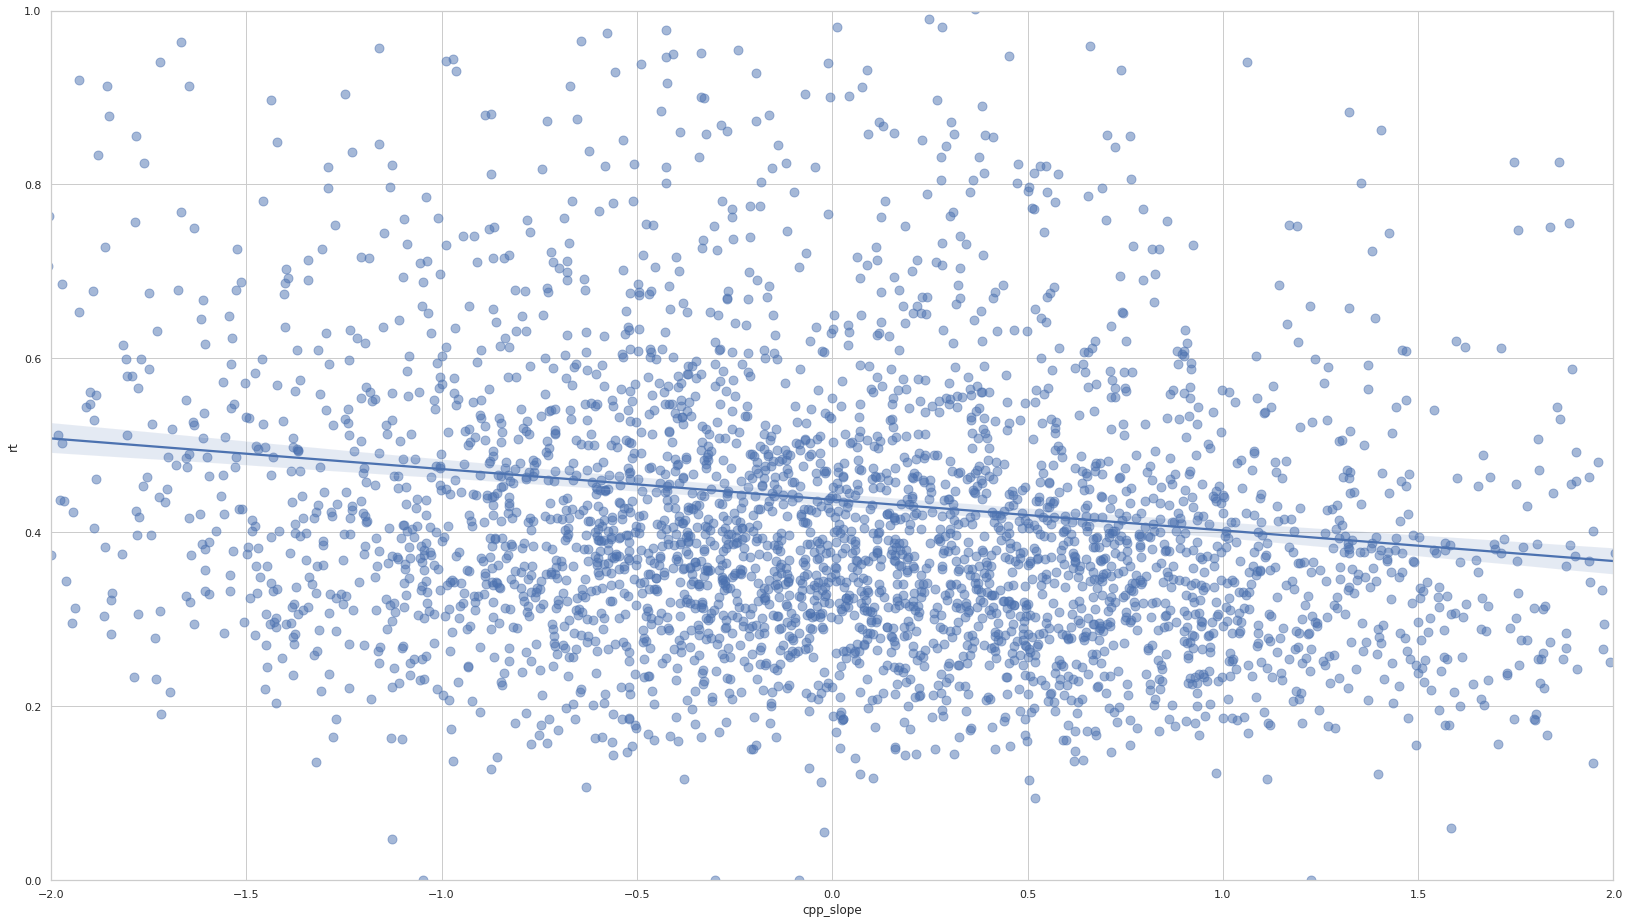

In [12]:

# Set the figure size
fig = plt.figure(figsize=(28,16))

# Create the regplot two coherence for the current subject
sns.regplot(x=cpp, 
           y="rt", 
           data=data, 
           ci=95, 
           scatter_kws={"s": 80,"alpha":0.5},)
# Set the title of the subplot
plt.xlim([-2,2])
plt.ylim([0,1])

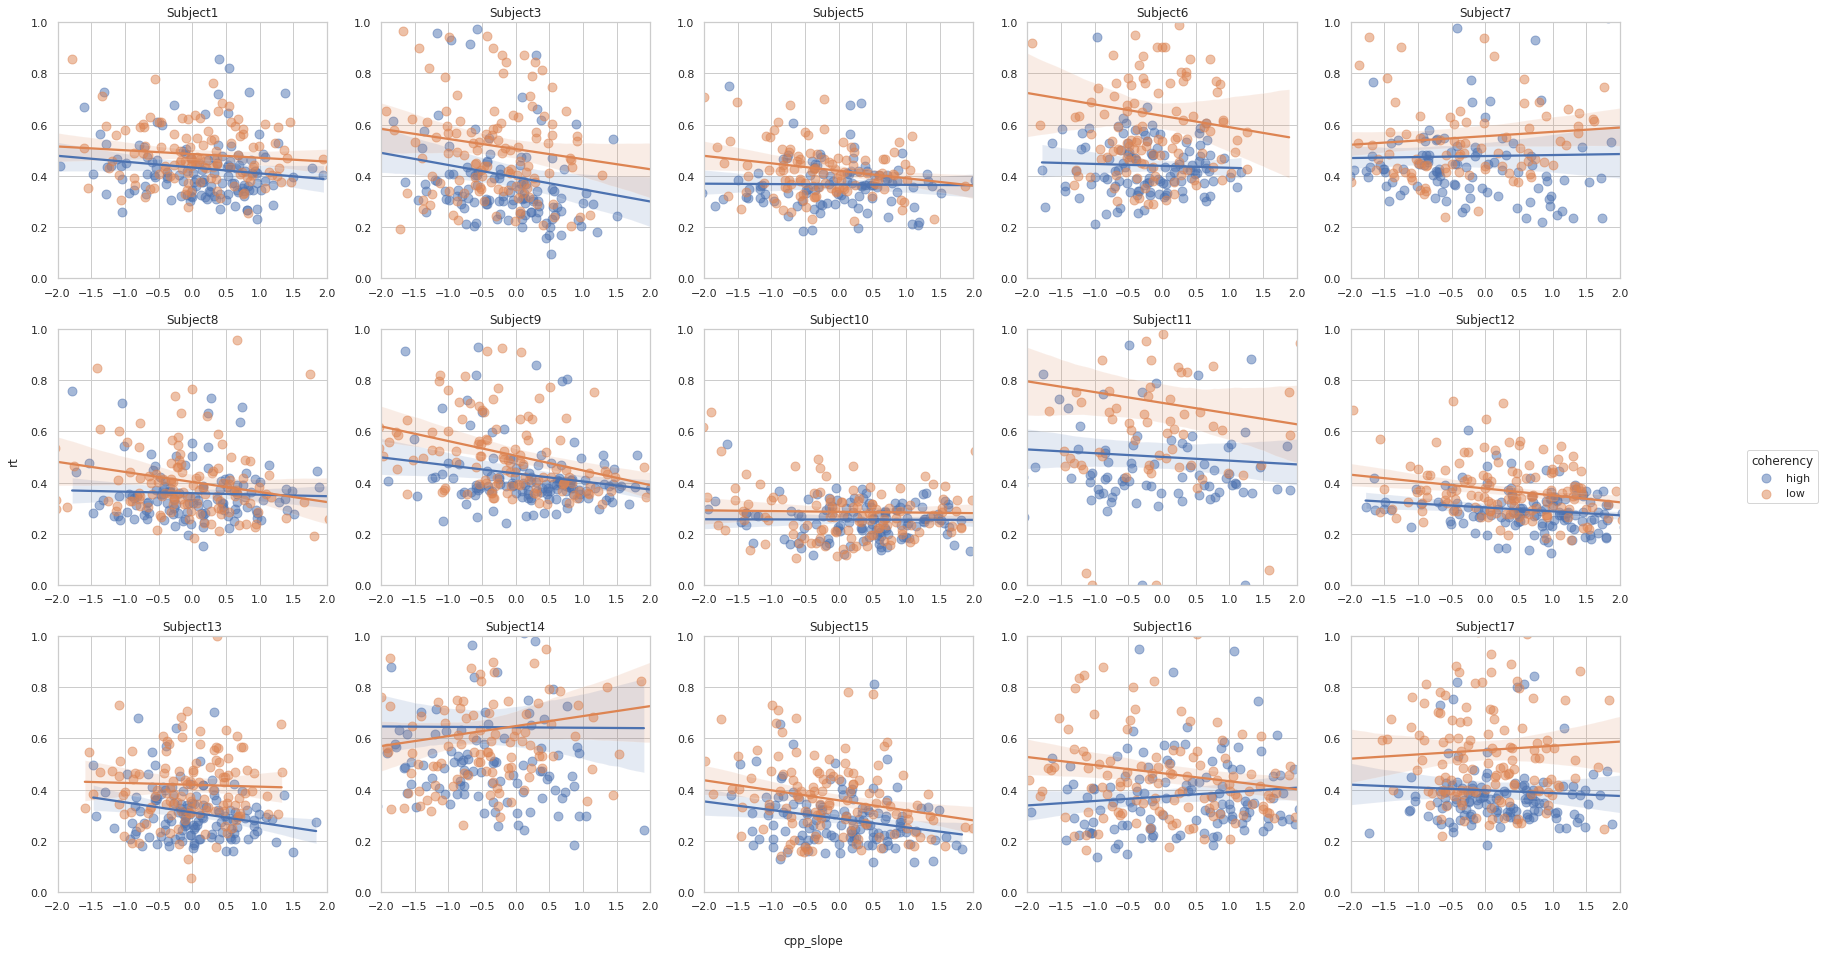

In [308]:
# Set the feature
cpp = "cpp_slope"
# Set the figure size
fig = plt.figure(figsize=(28,16))
# Get the unique subject indices
subj_indices = data['subj_idx'].unique()
# Loop over the subject indices
for i,subj in enumerate(np.sort(subj_indices)):
    # Create a subplot for each subject
    ax = fig.add_subplot(3,5,i+1)
    # Create the regplot two coherence for the current subject
    sns.regplot(x=cpp, 
               y="rt", 
               data=data[(data['subj_idx']==subj)&(data['coherency']=='high')], 
               ci=95, 
               scatter_kws={"s": 80,"alpha":0.5},
               label='high',
               ax=ax)
    sns.regplot(x=cpp, 
               y="rt", 
               data=data[(data['subj_idx']==subj)&(data['coherency']=='low')], 
               ci=95, 
               scatter_kws={"s": 80,"alpha":0.5},
               label='low',
               ax=ax)
    # Set the title of the subplot
    ax.set_title(f'Subject{subj}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim([-2,2])
    ax.set_ylim([0,1])
# Add the x-label to the figure
fig.text(0.5, 0.08, cpp, ha='center')
# Add the y-label to the figure
fig.text(0.1, 0.5, 'rt', va='center', rotation='vertical')
# Get the label of the ax
line, labels = ax.get_legend_handles_labels()
# Add the label of the figure
fig.legend(line, 
           labels,
           title='coherency',
           loc = 'center right')

## peak

### regplot

In [17]:
# Set the feature
cpp = "cpp_peak"
# Regression
y = data['rt']
x = data[cpp]
X = sm.add_constant(x)

m = sm.OLS(y,X)
mrs = m.fit()
mrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.128
Date:                Fri, 13 Jan 2023   Prob (F-statistic):            0.00762
Time:                        10:26:29   Log-Likelihood:                 419.35
No. Observations:                3661   AIC:                            -834.7
Df Residuals:                    3659   BIC:                            -822.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4376      0.004    122.662      0.000       0.431       0.445
cpp_peak       0.0095      0.004      2.670      0.008       0.003       0.017
==============================================================================
Omnibus:                     1846.617   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13424.926
Skew:                           2.308   Prob(JB):                         0.00
Kurtosis:                      11.167   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 1.0)

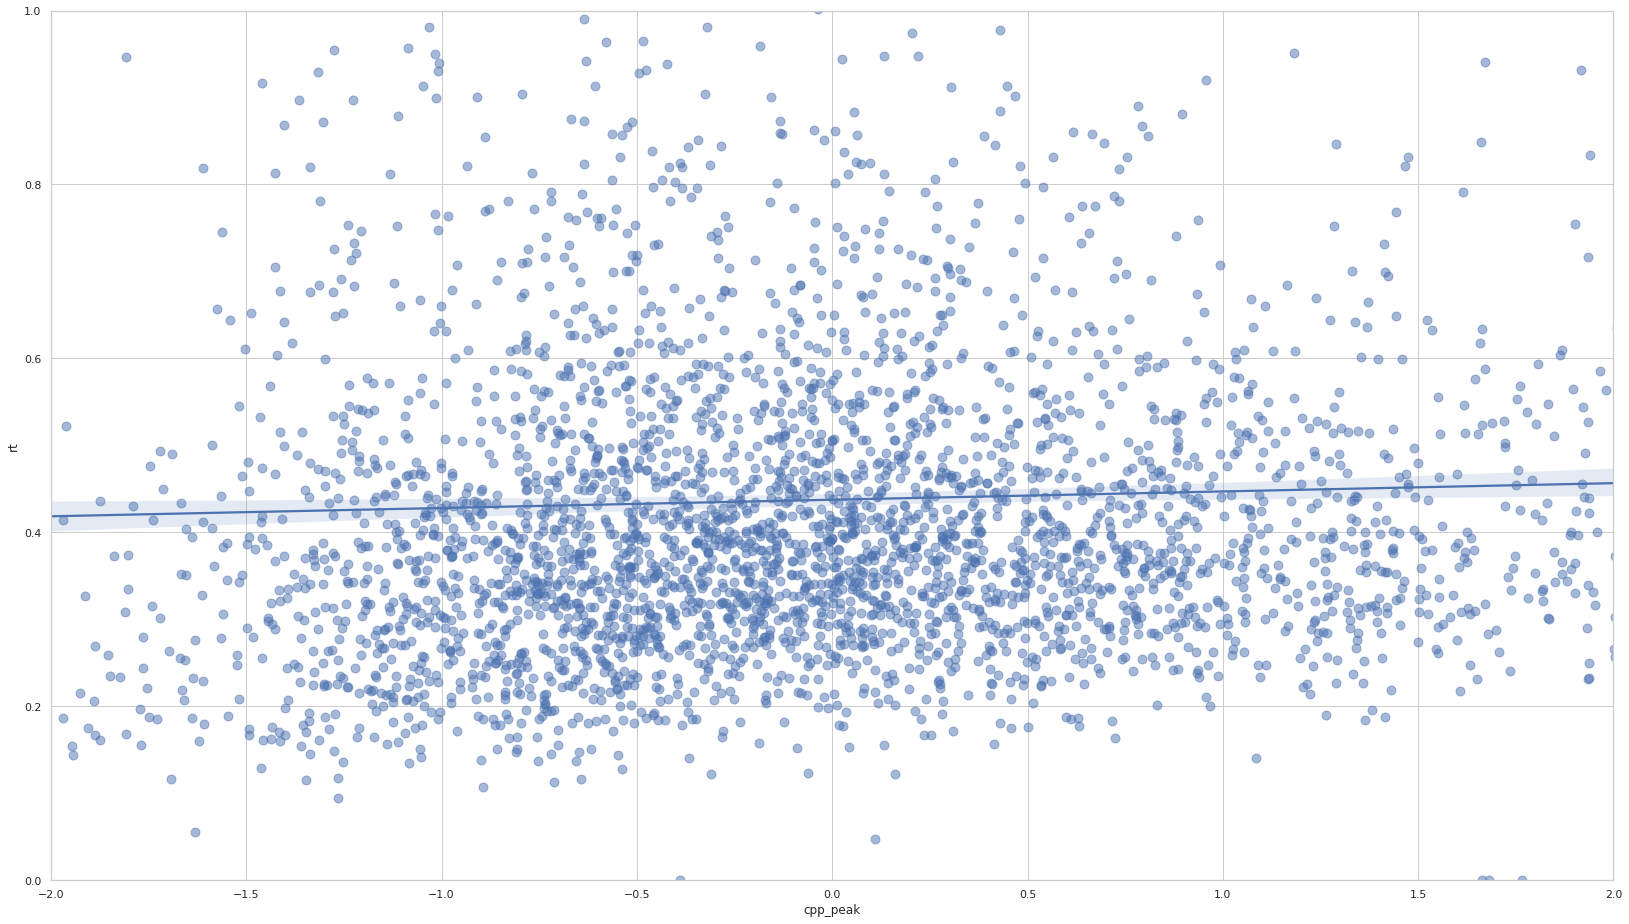

In [13]:

# Set the figure size
fig = plt.figure(figsize=(28,16))

# Create the regplot two coherence for the current subject
sns.regplot(x=cpp, 
           y="rt", 
           data=data, 
           ci=95, 
           scatter_kws={"s": 80,"alpha":0.5},)
# Set the title of the subplot
plt.xlim([-2,2])
plt.ylim([0,1])

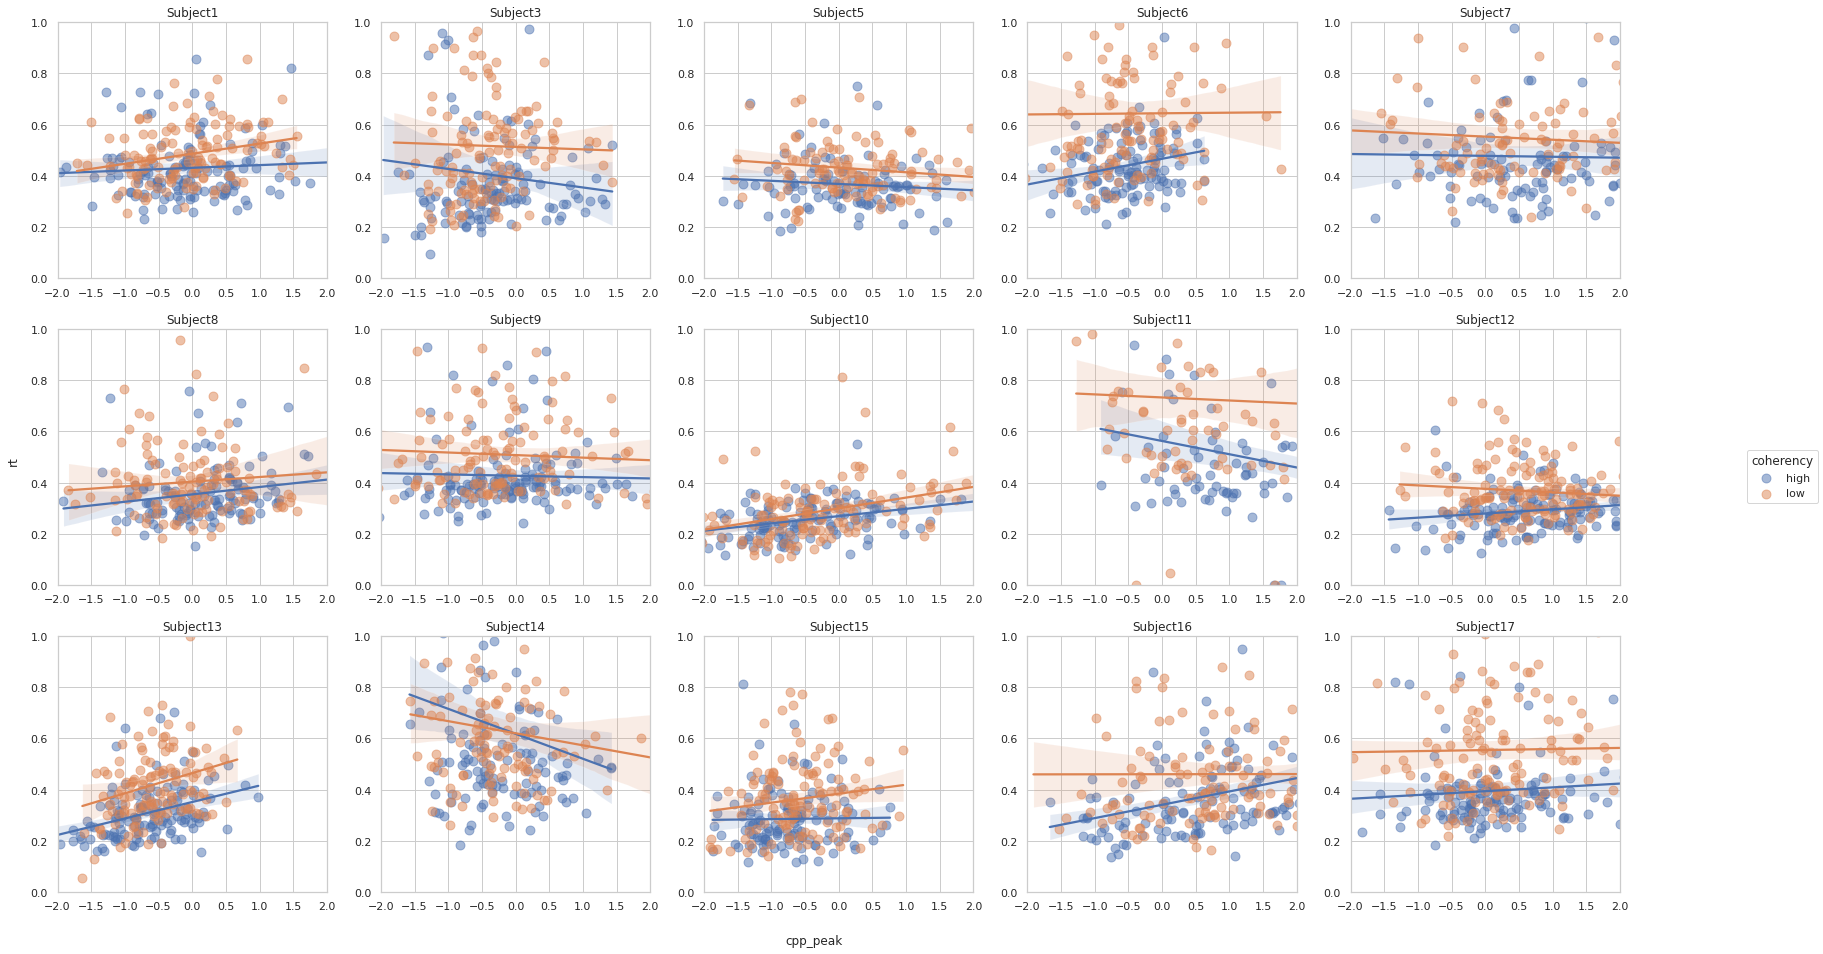

In [309]:
# Set the feature
cpp = "cpp_peak"
# Set the figure size
fig = plt.figure(figsize=(28,16))
# Get the unique subject indices
subj_indices = data['subj_idx'].unique()
# Loop over the subject indices
for i,subj in enumerate(np.sort(subj_indices)):
    # Create a subplot for each subject
    ax = fig.add_subplot(3,5,i+1)
    # Create the regplot of two coherence for the current subject
    sns.regplot(x=cpp, 
               y="rt", 
               data=data[(data['subj_idx']==subj)&(data['coherency']=='high')], 
               ci=95, 
               scatter_kws={"s": 80,"alpha":0.5},
               label='high',
               ax=ax)
    sns.regplot(x=cpp, 
               y="rt", 
               data=data[(data['subj_idx']==subj)&(data['coherency']=='low')], 
               ci=95, 
               scatter_kws={"s": 80,"alpha":0.5},
               label='low',
               ax=ax)
    # Set the title of the subplot
    ax.set_title(f'Subject{subj}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim([-2,2])
    ax.set_ylim([0,1])
# Add the x-label to the figure
fig.text(0.5, 0.08, cpp, ha='center')
# Add the y-label to the figure
fig.text(0.1, 0.5, 'rt', va='center', rotation='vertical')
# Get the label of the ax
line, labels = ax.get_legend_handles_labels()
# Add the label of the figure
fig.legend(line, 
           labels,
           title='coherency',
           loc = 'center right')